In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary


In [19]:
torch.manual_seed(23)
torch.cuda.manual_seed(23)


In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

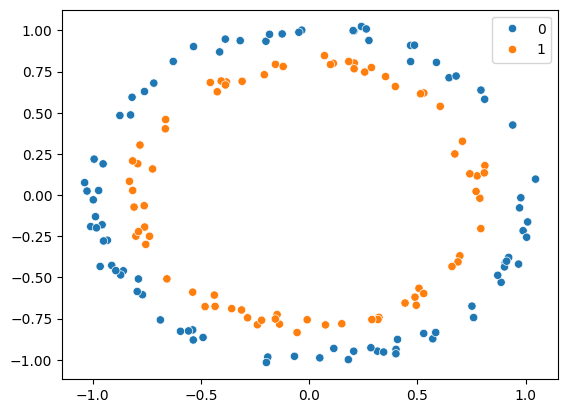

In [16]:
data = make_circles(n_samples=800, noise=0.03, random_state=23)

X, y = data

X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=23
)

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='tab10')


X_train = torch.tensor(X_train).to(device).type(torch.float)
y_train = torch.tensor(y_train).to(device).type(torch.float)
X_test = torch.tensor(X_test).to(device).type(torch.float)
y_test = torch.tensor(y_test).to(device).type(torch.float)


In [4]:
# create custom class
class CircleClassifierV0(nn.Module):
	def __init__(self) -> None:
		super().__init__()

		# create linear layers
		self.layer1 = nn.Linear(in_features=2, out_features=5)
		self.layer2 = nn.Linear(in_features=5, out_features=1)


	def forward(self, X: torch.Tensor) -> torch.Tensor:
		return self.layer2(self.layer1(X))


#model1 = CircleClassifierV0().to(device)


In [5]:
def accuracy(y_pred, y_test) -> float:
	y_pred = y_pred.to(device)
	y_test = y_test.to(device)
	return sum(y_pred == y_test) / len(y_test)


epoch=100, loss=0.69, test_loss=0.69, acc=58.1%
epoch=200, loss=0.69, test_loss=0.69, acc=60.0%
epoch=300, loss=0.68, test_loss=0.68, acc=60.6%
epoch=400, loss=0.67, test_loss=0.68, acc=62.5%
epoch=500, loss=0.66, test_loss=0.67, acc=63.8%
epoch=600, loss=0.65, test_loss=0.66, acc=63.8%
epoch=700, loss=0.63, test_loss=0.65, acc=68.1%
epoch=800, loss=0.62, test_loss=0.63, acc=74.4%
epoch=900, loss=0.60, test_loss=0.62, acc=78.8%
epoch=1000, loss=0.58, test_loss=0.60, acc=80.0%


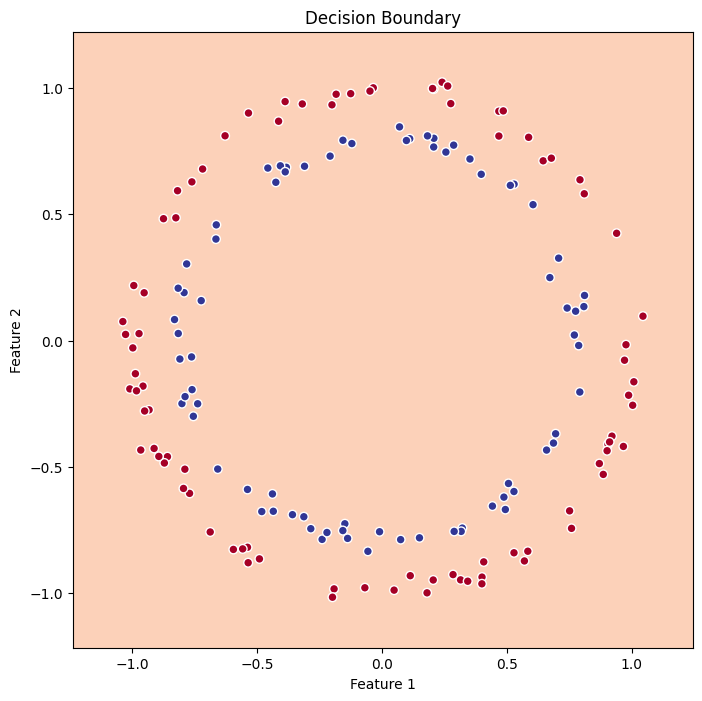

In [25]:
model = nn.Sequential(
	nn.Linear(2, 6),
	nn.ReLU(),
	nn.Linear(6, 1),
	nn.Sigmoid()
).to(device)

loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 1000

for epoch in range(1, epochs+1):
	model.train()

	y_logits = model(X_train).squeeze()

	loss = loss_fn(y_logits, y_train)

	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	model.eval()
	with torch.inference_mode():
		y_logits_test = model(X_test).squeeze()
		test_loss = loss_fn(y_logits_test, y_test)
		acc = accuracy(torch.round(y_logits_test), y_test) * 100

	if epoch % 100 == 0:
		print(f'{epoch=}, {loss=:.2f}, {test_loss=:.2f}, {acc=:.1f}%')

plot_decision_boundary(model, X_test, y_test)
